<ipython-input-1-2837c2b9c59c>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


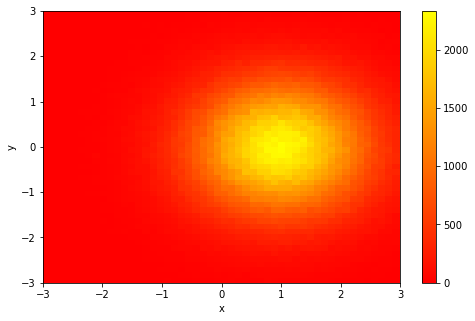

In [1]:
import boost_histogram as bh
import hist
import numpy as np
import matplotlib.pyplot as plt


h = hist.NamedHist(
    hist.axis.Regular(50, -3, 3, name="x"),
    hist.axis.Regular(50, -3, 3, name="y"),
)

x = np.random.randn(1_000_000) + np.ones(1_000_000)
y = np.random.randn(1_000_000)

# fill by names: forbidden when axes do not have name
h.fill(y=y, x=x)
# equivalent to h.fill(x, y)
# h.fill(x, y, x=x, y=y) is okay, but only be filled once

fig, ax = plt.subplots(figsize=(8,5))
w, x, y = h.to_numpy()
mesh = ax.pcolormesh(x, y, w.T, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(mesh)
fig.show()